In [1]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
import keras.utils
from keras.datasets import mnist
from keras import backend as K
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
% matplotlib inline



C:\Users\dolla\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


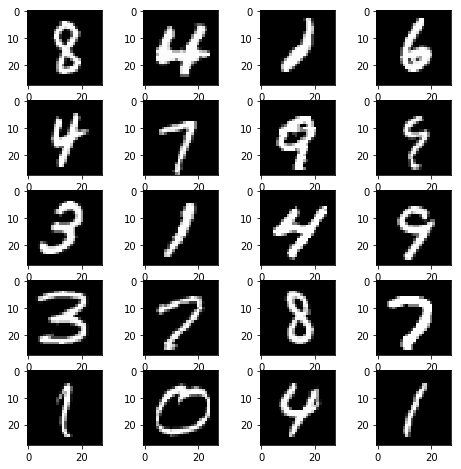

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

index = np.random.choice(x_train.shape[0], 21, replace=False)
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img = x_train[index[i]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [3]:
num_classes = 10

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255  # normalize dataset
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [4]:
# create model many layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# ***padding = same : will auto make zero padding

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [6]:
adam = Adam(lr=0.001)       # optimiser with Adam
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train,
          batch_size=100,
          epochs=1,
          validation_data=(x_test, y_test),
          validation_split=0.2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 448s 7ms/step - loss: 0.1774 - acc: 0.9435 - val_loss: 0.0423 - val_acc: 0.9872


In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')                                   
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))   # result matrix form predict answer

Test loss: 0.04227126560355537
Test accuracy: 0.9872
Confusion Matrix
[[ 964    0    3    0    2    1    1    1    2    6]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   2    3 1021    0    1    0    0    5    0    0]
 [   0    0    1  996    0    6    0    3    2    2]
 [   0    0    0    0  980    0    0    2    0    0]
 [   0    0    0    2    0  888    1    1    0    0]
 [   1    3    0    0    3    5  945    0    1    0]
 [   0    2    3    0    0    0    0 1021    1    1]
 [   3    2    3    1    4    0    2    4  948    7]
 [   0    5    0    0   14    3    0   10    1  976]]


In [9]:
inp = model.input
outputs = [layer.output for layer in model.layers if type(layer) == Conv2D]
functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]

def showLayerOutput(imgIndex):
    layer_out = [func([x_train[imgIndex:imgIndex + 1]]) for func in functors]
    fig = plt.figure(figsize=(8, 8))
    columns = 4
    rows = 3
    j = 1
    for l in range(len(layer_out)):
        out = layer_out[l][0][0]
        out = np.swapaxes(out, 2, 0)
        out = np.swapaxes(out, 1, 2)
        for i in range(1, 5):
            img = out[i]
            fig.add_subplot(rows, columns, j)
            j = j + 1
            plt.imshow(img)
    plt.show()


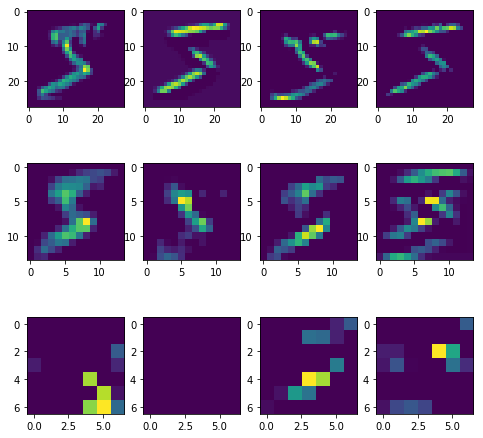

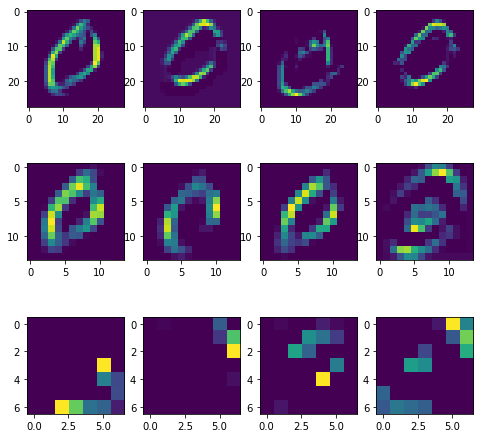

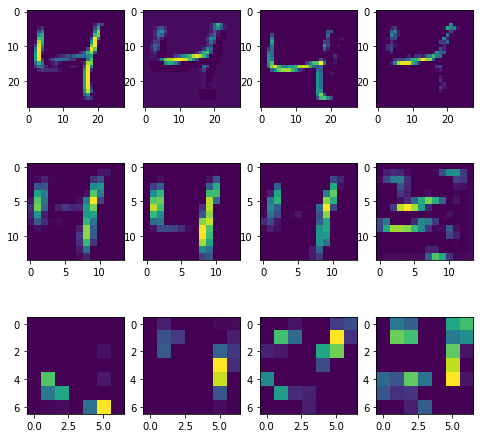

In [10]:
showLayerOutput(0)
showLayerOutput(1)
showLayerOutput(2)